In [1]:
import pdb
import numpy as np
import matplotlib.pyplot as plt

## Source: https://stackoverflow.com/questions/59773795/generating-rows-of-a-rule-30-cellular-automaton

In [2]:
#rule description: https://mathworld.wolfram.com/Rule30.html
def rule30(array):
#     pdb.set_trace()
    row1 = np.pad(array,[(0,0), (1,1)], mode='constant')
    next_row = array.copy()
    for x in range(1, array.shape[0]+1):
        for y in range(1, array.shape[1]+1):
            if row1[x-1][y-1] == 1 ^ (row1[x-1][y] == 1 or row1[x-1][y+1] == 1):
                next_row[x - 1, y - 1] = 1
            else:
                next_row[x - 1, y - 1] = 0
        return np.concatenate((array, next_row))
    
def initial_state(width):
    initial = np.zeros((1, width), dtype=int)
    if width % 2 == 0:
        initial = np.insert(initial, int(width / 2), values=0, axis=1)
        initial[0, int(width / 2)] = 1
        return initial
    else:
        initial[0, int(width / 2)] = 1
        return initial

def apply_rule(n):
    rv = initial_state(n)
    while rv[-1][0] == 0:
        rv = np.append(rv, rule30(rv[-1].reshape(1,-1)), axis=0)
    return rv

In [3]:
apply_rule(7)

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 1, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 1, 0],
       [1, 1, 0, 1, 1, 1, 1]])

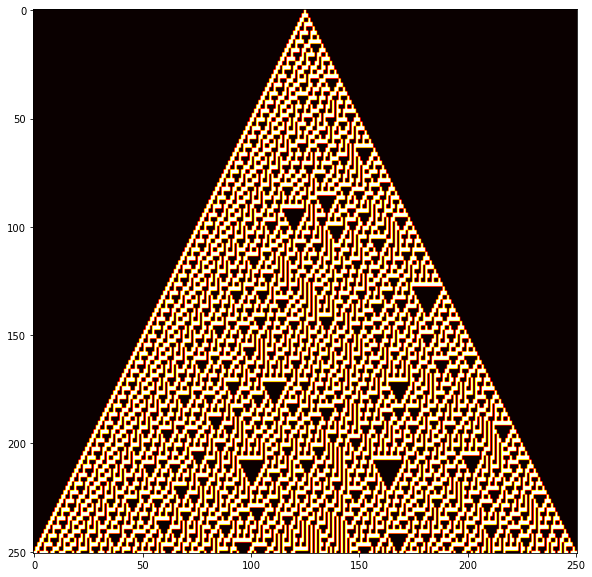

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(apply_rule(250), cmap='hot')